# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [2]:
base = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [3]:
base.head(10)

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
5,60,1,151,67,2,2,0,0,0,0
6,61,1,157,93,3,1,0,0,1,0
7,62,2,178,95,3,3,0,0,1,1
8,48,1,158,71,1,1,0,0,1,0
9,54,1,164,68,1,1,0,0,0,0


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [5]:
base.describe()

,age,gender,height,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
base['weight'].head(5)

0    62
1    85
2    64
3    82
4    56
Name: weight, dtype: object

In [15]:
base['weight'] = base['weight'].str.replace(',', '.', regex=False)
base['weight'] = base['weight'].astype(float)
base['weight'] = base['weight'].round().astype(int)

In [16]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             10000 non-null  int64
 1   gender          10000 non-null  int64
 2   height          10000 non-null  int64
 3   weight          10000 non-null  int64
 4   cholesterol     10000 non-null  int64
 5   gluc            10000 non-null  int64
 6   smoke           10000 non-null  int64
 7   alco            10000 non-null  int64
 8   active          10000 non-null  int64
 9   cardio_disease  10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [17]:
base.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,74.303600,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,14.566271,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Variável 'Age'  
Ao análisar a variável por meio do boxplot, verificamos conter a presença de apenas um outlier, a idade 30, e os valores do limite inferior do boxplot iniciam em 39. De todo modo, pode-se observar que os valores de média e mediana dessa variável são próximos. Optou-se por manter a idade de 30. 

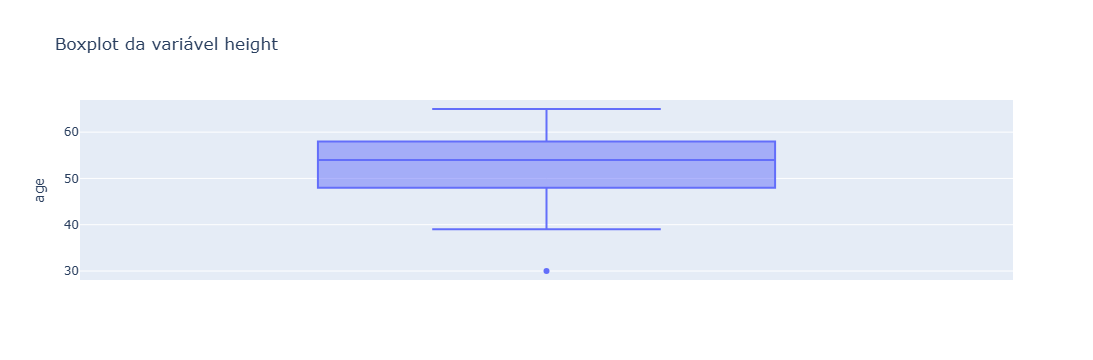

In [21]:
sns.set_style('darkgrid')

fig = px.box(base, y='age', title='Boxplot da variável height')
fig.show()

### Variável 'height'  
Assim como na variável anterior, pode-se observar que os valores de média e mediana de height são próximos. COntudo, ao plotar o boxplot, temos valores extremos tanto superiores quanto inferiores. Algumas alturas estão distantes da média global e podem ter origem em um preenchimento incorreto do dado.  
Optou-se pela atuação nos outliers por meio do método Capping. 

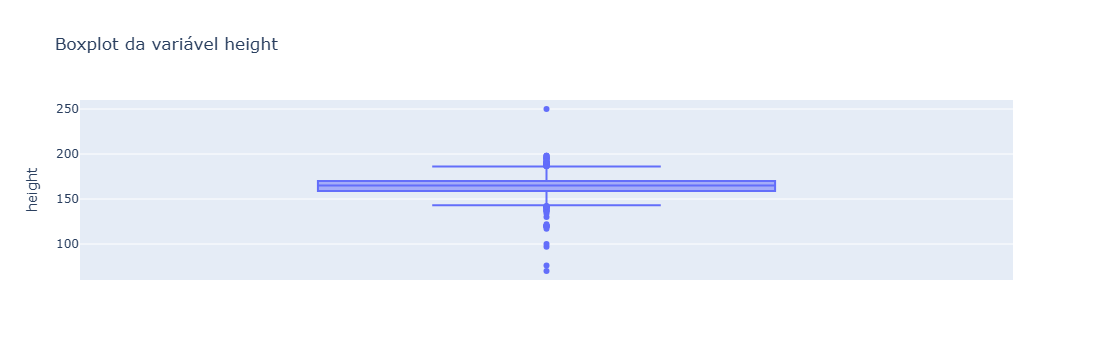

In [22]:
sns.set_style('darkgrid')

fig = px.box(base, y='height', title='Boxplot da variável height')
fig.show()

In [24]:
Q1 = base['height'].quantile(0.25)
Q3 = base['height'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

base['height'] = base['height'].clip(upper=limite_superior)
base['height'] = base['height'].clip(lower=limite_inferior)

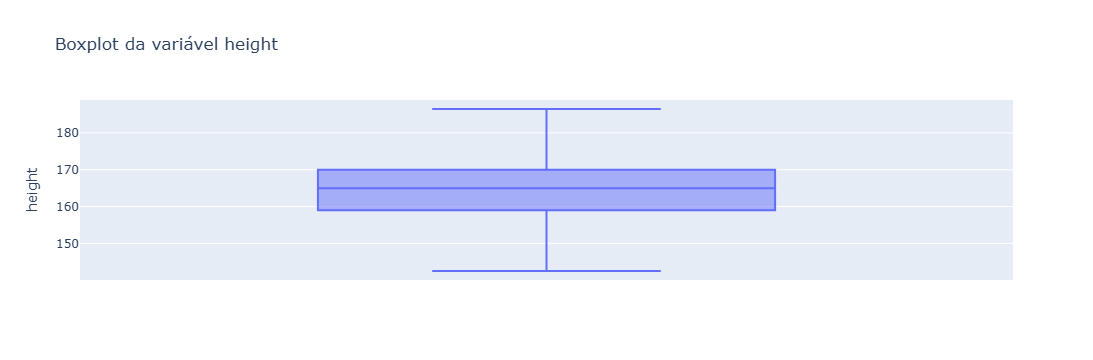

In [25]:
sns.set_style('darkgrid')

fig = px.box(base, y='height', title='Boxplot da variável height')
fig.show()

### Variável 'Weight'  
Plotando o boxplot da variável weight, observa-se que ela também possui outliers tanto em valores superiores quanto em inferiores. Também foi plotado um histograma para verificarmos de forma mais visual a distribuição dos dados na variável.  
Para essa variável foi utilizado o método IQR, subistituindo valores. Foram substituídos os valores abaixo de 40 e acima de 120, mantendo alguns outliers acima do limite superior para posterior verificação do comportamento no modelo.

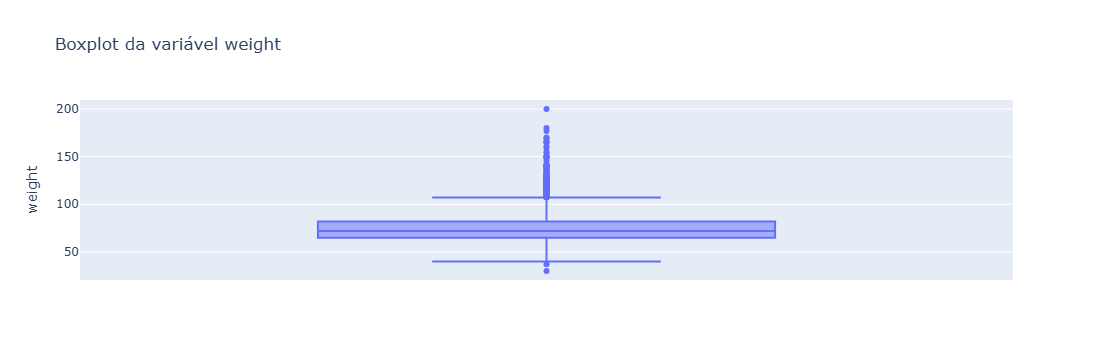

In [26]:
sns.set_style('darkgrid')

fig = px.box(base, y='weight', title='Boxplot da variável weight')
fig.show()

<Axes: xlabel='weight', ylabel='Count'>

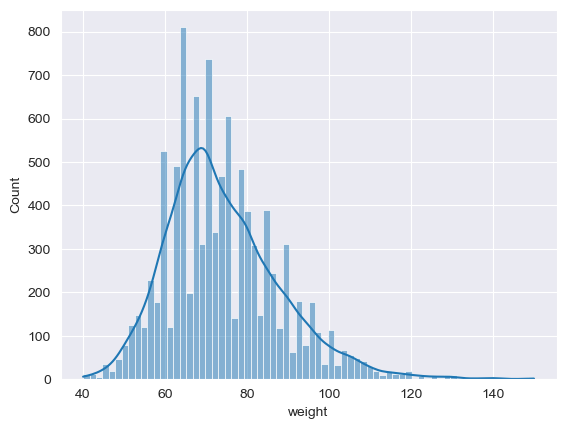

In [31]:
sns.histplot(data=base, x = 'weight', kde=True)

In [33]:
print('Porcentagem de registros em weight > 120: ',
    (len(base[base['weight'] > 120]) / len(base)) * 100)

Porcentagem de registros em weight > 120:  0.67


In [34]:
Q1 = base['weight'].quantile(0.25)
Q3 = base['weight'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

weight_sem_outliers = base[(base['weight'] >= limite_inferior) & (base['weight'] <= limite_superior)]

mediana_sem_outliers = weight_sem_outliers['weight'].median()

base.loc[base['weight'] > 120, 'weight'] = mediana_sem_outliers
base.loc[base['weight'] < 40, 'weight'] = mediana_sem_outliers

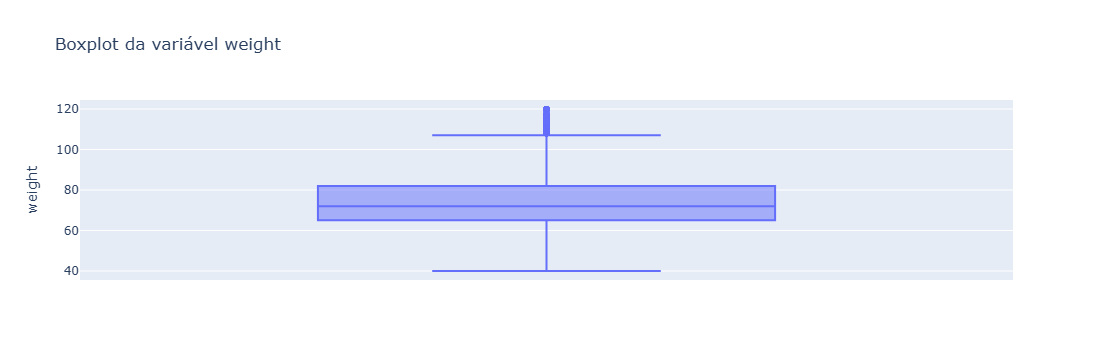

In [35]:
sns.set_style('darkgrid')

fig = px.box(base, y='weight', title='Boxplot da variável weight')
fig.show()

# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


In [42]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  int64  
 1   gender          10000 non-null  int64  
 2   height          10000 non-null  float64
 3   weight          10000 non-null  int64  
 4   cholesterol     10000 non-null  int64  
 5   gluc            10000 non-null  int64  
 6   smoke           10000 non-null  int64  
 7   alco            10000 non-null  int64  
 8   active          10000 non-null  int64  
 9   cardio_disease  10000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 781.4 KB


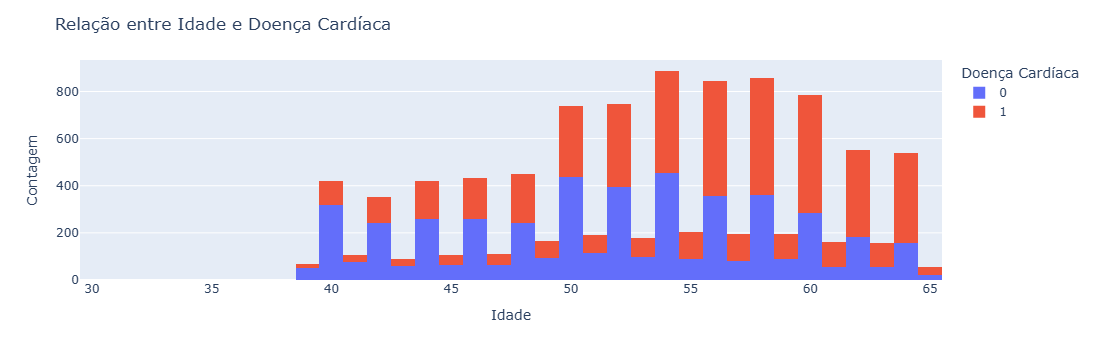

In [45]:
fig = px.histogram(base, x='age', color='cardio_disease', barmode='stack')

fig.update_layout(title='Relação entre Idade e Doença Cardíaca',
                  xaxis_title= 'Idade',
                  yaxis_title= 'Contagem',
                  legend_title= 'Doença Cardíaca')
fig.show()

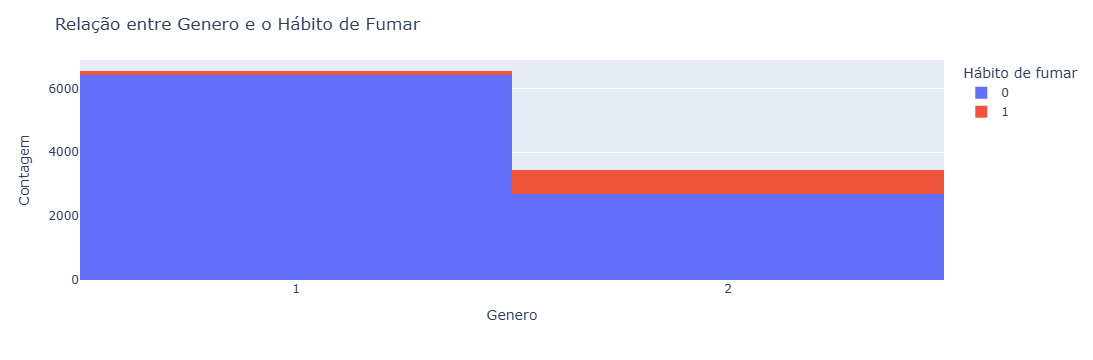

In [57]:
fig = px.histogram(base, x='gender', color='smoke', barmode='stack')

fig.update_layout(title='Relação entre Genero e o Hábito de Fumar',
                  xaxis_title= 'Genero',
                  yaxis_title= 'Contagem',
                  legend_title= 'Hábito de fumar')
fig.show()

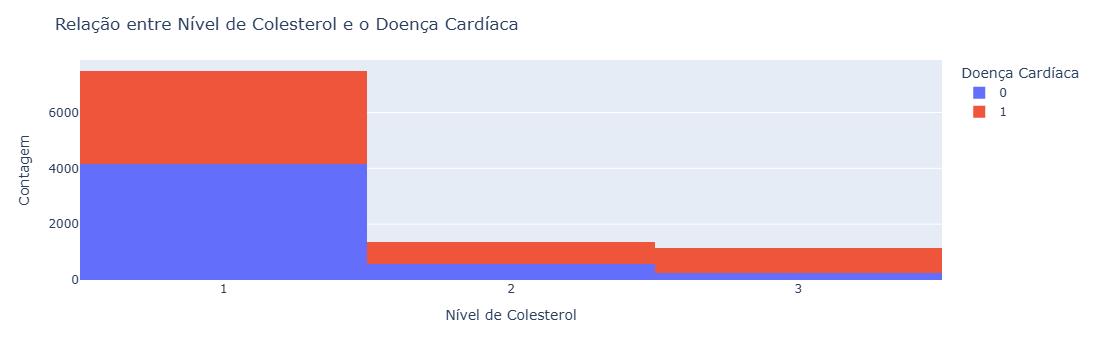

In [72]:
fig = px.histogram(base, x='cholesterol', color='cardio_disease', barmode='stack')

fig.update_layout(title='Relação entre Nível de Colesterol e o Doença Cardíaca',
                  xaxis_title= 'Nível de Colesterol',
                  yaxis_title= 'Contagem',
                  legend_title= 'Doença Cardíaca')
fig.show()

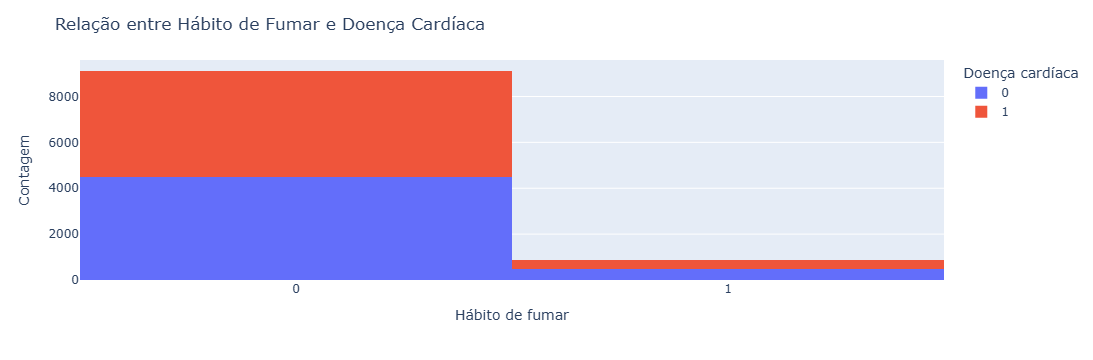

In [58]:
fig = px.histogram(base, x='smoke', color='cardio_disease', barmode='stack')

fig.update_layout(title='Relação entre Hábito de Fumar e Doença Cardíaca',
                  xaxis_title= 'Hábito de fumar',
                  yaxis_title= 'Contagem',
                  legend_title= 'Doença cardíaca')
fig.show()

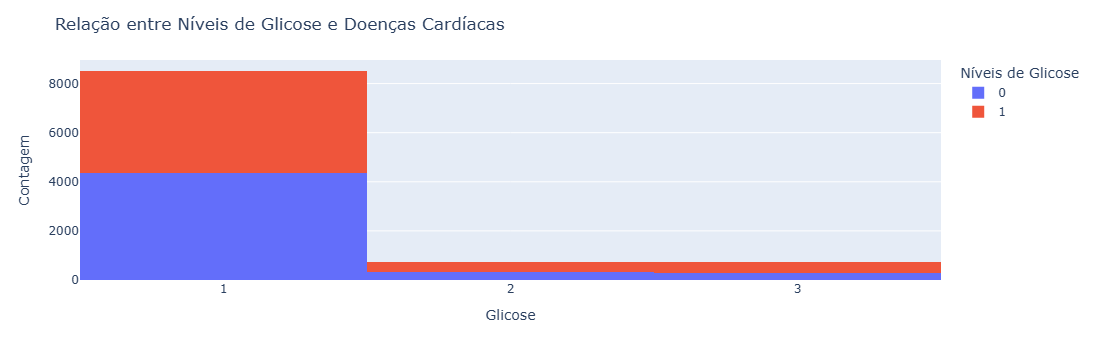

In [68]:
fig = px.histogram(base, x='gluc', color='cardio_disease', barmode='stack')
fig.update_layout (title='Relação entre Níveis de Glicose e Doenças Cardíacas',
                  xaxis_title= 'Glicose',
                  yaxis_title= 'Contagem',
                  legend_title= 'Níveis de Glicose')
fig.show()

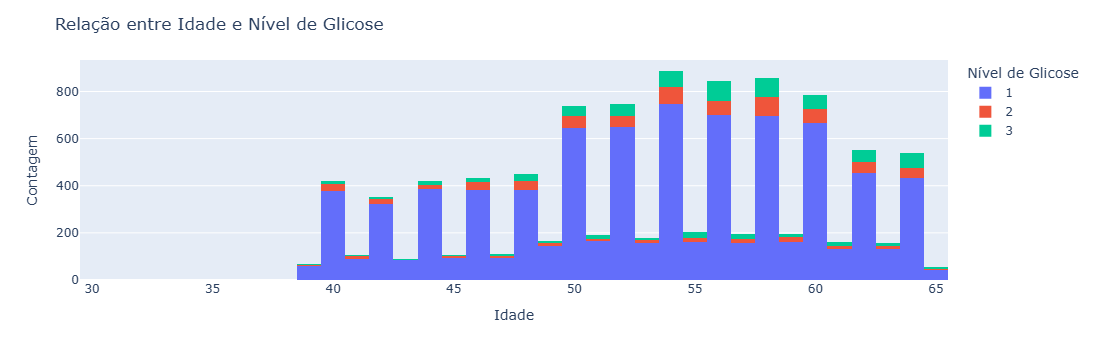

In [70]:
fig = px.histogram(base, x='age', color='gluc', barmode='stack')

fig.update_layout(title='Relação entre Idade e Nível de Glicose',
                  xaxis_title= 'Idade',
                  yaxis_title= 'Contagem',
                  legend_title= 'Nível de Glicose')
fig.show()

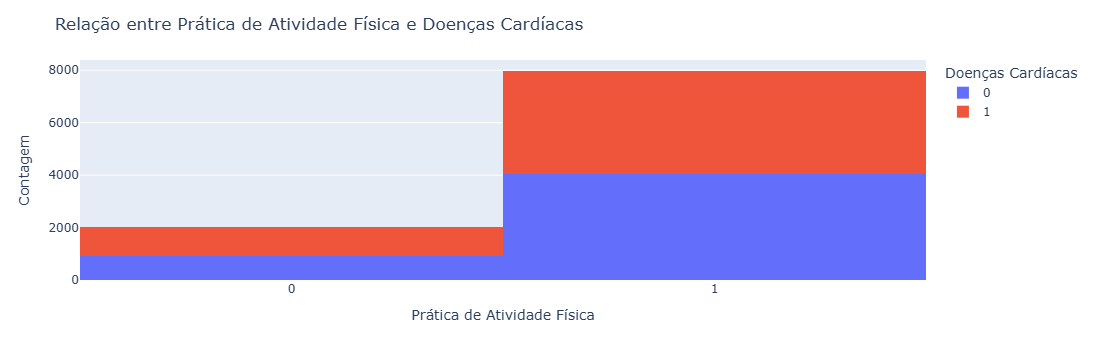

In [69]:
fig = px.histogram(base, x='active', color='cardio_disease', barmode='stack')
fig.update_layout (title='Relação entre Prática de Atividade Física e Doenças Cardíacas',
                  xaxis_title= 'Prática de Atividade Física',
                  yaxis_title= 'Contagem',
                  legend_title= 'Doenças Cardíacas')
fig.show()

Através de uma análise bivariada verificou-se uma relação entre **Idade** e a varivável **Doenças Cardíacas**, quanto maior a idade, maior a presença de doenças cardíacas. Explorando os dados, observa-se que o hábito de fumar é mais presente no público masculino e, dentre todas as pessoas que são fumantes, cerca de metade possui doença cardíaca.  
**Colesterol** é uma variável que se divide em três níveis. No nível um, pouco menos da metade dos dados são de pessoas com doença cardíaca. Contudo, ao verificarmos os níveis 2 e 3 observa-se que o aumento do nível também corresponde a aumento da porcentagem de pessoas com doenças cardíacas.   
O nível de **Glicose** 1 é o que possui a maior concentração de dados dentre os três níveis presentes na variável, cerca de metade dos dados presentes no nível 1 de glicose são de pessoas com **Doenças Cardíacas**. Os níveis 2 e 3 d glicose apresentam quantidades semelhantes de dados e, em ambos os casos, quase metade de seus dados são de pessoas com doenças cardíacas. **Idade** também parece ser um fator que se relaciona com **Glicose**, apesar da maioria dos dados serem de pessoas com nível 1 de glicose, observa-se um aumento da presença de níveis 2 e 3 conforme a idade aumenta.  
É necessário plotar uma matriz de correlação para verificarmos as correlações entre as variáveis presentes na base.

# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



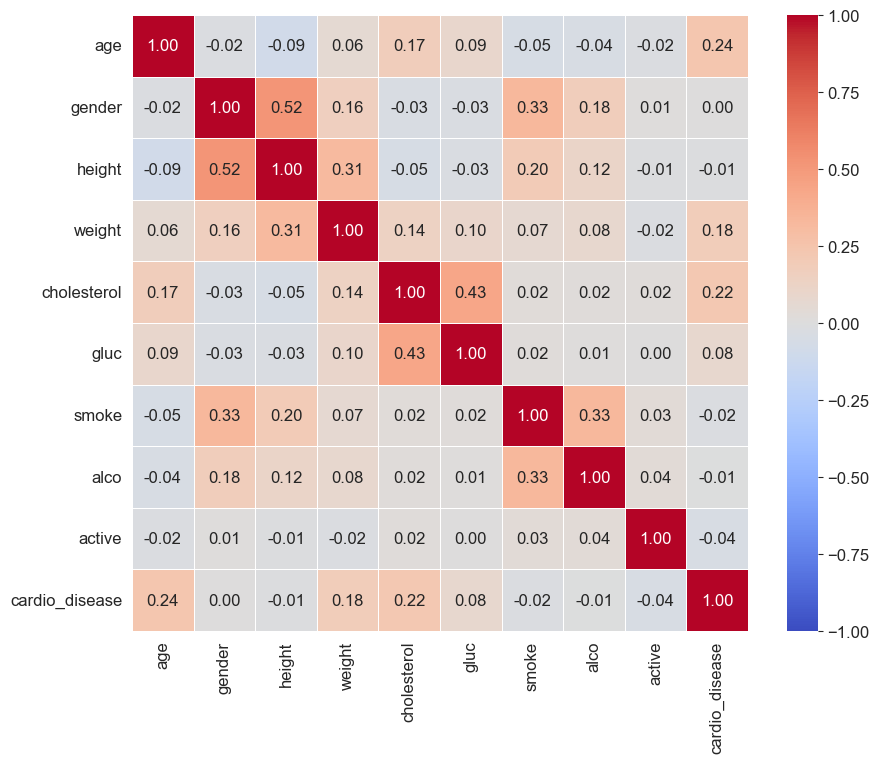

In [71]:
corr = base.corr()

plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(corr, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

Verificando nossa variável target, temos poucas variáveis com relação forte com ela. Sendo elas: **Colesterol**, **Altura**, **Peso** e **Idade**.  
Contudo, é possível verificar relaçoes fortes entre as outras variáveis, como entre:  
- **Consumo de Álcool** X **Hábito de Fumar**
- **Colesterol** X **Glicose**
- **Genero** X **Altura**

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [117]:
X = base.drop('cardio_disease', axis=1) 
Y = base['cardio_disease']

In [118]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

### Padronização dos dados

In [119]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Balanceamento 

In [100]:
contagem_classes = y_train.value_counts()

print("Contagem de amostras por classe:")
print(contagem_classes)

Contagem de amostras por classe:
cardio_disease
1    3774
0    3726
Name: count, dtype: int64


In [101]:
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [102]:
contagem_classes = y_train_balanced.value_counts()

print("Contagem de amostras por classe:")
print(contagem_classes)

Contagem de amostras por classe:
cardio_disease
1    3774
0    3774
Name: count, dtype: int64


In [103]:
contagem_classes = y_test.value_counts()

print("Contagem de amostras por classe:")
print(contagem_classes)

Contagem de amostras por classe:
cardio_disease
1    1257
0    1243
Name: count, dtype: int64


In [104]:
print('Tamanho do x_train:', x_train.shape)
print('Tamanho do x_test:', x_test.shape)
print('Tamanho do y_train:', y_train.shape)
print('Tamanho do y_test:', y_test.shape)

Tamanho do x_train: (7500, 9)
Tamanho do x_test: (2500, 9)
Tamanho do y_train: (7500,)
Tamanho do y_test: (2500,)


# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [105]:
logistic_cardio = LogisticRegression(random_state = 0)

In [106]:
logistic_cardio.fit(x_train_balanced, y_train_balanced)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [107]:
logistic_cardio.intercept_

array([0.01291003])

In [108]:
logistic_cardio.coef_

array([[ 0.44409088,  0.01133345, -0.0912212 ,  0.31743799,  0.40635233,
        -0.05466283, -0.02956953, -0.00330536, -0.08489394]])

In [109]:
previsoes = logistic_cardio.predict(x_train_balanced)

In [110]:
relatorio = classification_report(y_train_balanced, previsoes)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      3774
           1       0.64      0.61      0.63      3774

    accuracy                           0.64      7548
   macro avg       0.64      0.64      0.64      7548
weighted avg       0.64      0.64      0.64      7548



Na etapa de treino o modelo apresentou **Acurária** foi de 0.64, o que significa que ele foi capaz de acertar 64% das previsões gerais.  
Para a classe 1, alcançou **precision** de 0.64 e **recall** de 0.61. Sendo assim, ele acerta 61% dos positivos, mas falha em detectar 39% dos positivos.  
É necessário avaliar o desempenho na base de teste, mas as métricas com a base de treino indicam que há espaço para melhorias no modelo. 

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [120]:
Y_pred_test = logistic_cardio.predict(x_test)

In [121]:
relatorio = classification_report(y_test, Y_pred_test)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1243
           1       0.66      0.59      0.62      1257

    accuracy                           0.64      2500
   macro avg       0.64      0.64      0.64      2500
weighted avg       0.64      0.64      0.64      2500



In [124]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_test)

roc_auc = roc_auc_score(y_test, Y_pred_test)
print("AUC: {:.2f}".format(roc_auc))

AUC: 0.64


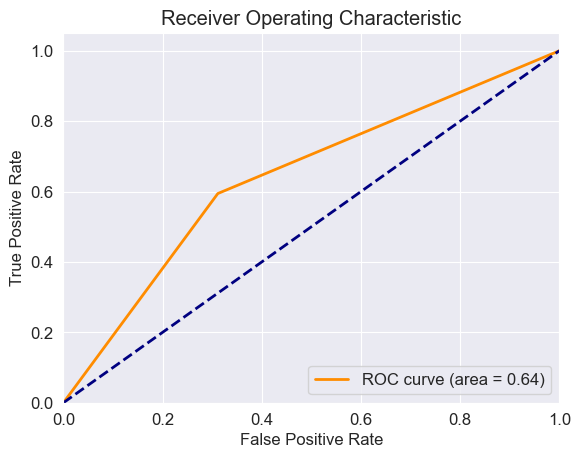

In [125]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Com a base de teste temos que a **Acurácia** permanece de 0.64 e o modelo segue predizendo corretamente em 64% dos casos gerais.  
Há um ligeiro aumento em **precision** indo para 0.66 e uma redução em **recall* chegando a 0.59. Isso significa que o modelo foi capaz de detectar apenas 59% dos casos positivos presentes na classe 1, falando em identificar 41% dos casos positivos.  
Modelo apresentou desempenho moderado entre as bases de treino e teste, sem indícios de overfitting, mas com espaço para melhoria. 

# 7) Explique:

A) Explique com suas palavras regressão logistica.

B) Explique porque a regressão logistica é um modelo de classificação.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.



A Regressão Logística é um algoritmo estatístico utilizado para prever uma variável binária, como 0 ou 1, fraude ou não fraude, entre outros. Seu objetivo não é prever um valor contínuo, mas sim classificar as observações em categorias.  
Tanto a Regressão Logística quanto a Regressão Linear utilizam uma combinação linear das variáveis. A logística faz uso da função logistíca (sigmóide), enquanto a linear utiliza a equação da reta. 